**TARGET ENCODING**

In [1]:
# LOAD DATA
import pandas as pd
autos = pd.read_csv("../../../data/autos.csv")
autos.shape

(193, 25)

In [2]:
# Show the mean of prices by make
autos.groupby(['make']).price.mean().head(3)

make
alfa-romero    15498.333333
audi           17859.166667
bmw            26118.750000
Name: price, dtype: float64

In [3]:
# Target encoding
autos['make_encoded'] = autos.groupby('make')['price'].transform('mean')
autos[['make', 'price', 'make_encoded']].head(3)

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333


In [4]:
# Smoothing
""" encoding = weight * in_category + (1 - weight) * overall

  where weight is a value between 0 and 1 calculated from category frequency

  weight = n / (n + m)
    n -> Total number of times
    m -> Smoothing factor (value 0.2, 0.5, 4, ...) 
      if the average price for each make were relatively stable, a smaller value could be okay.
"""


' encoding = weight * in_category + (1 - weight) * overall\n\n  where weight is a value between 0 and 1 calculated from category frequency\n\n  weight = n / (n + m)\n    n -> Total number of times\n    m -> Smoothing factor (value 0.2, 0.5, 4, ...) \n      if the average price for each make were relatively stable, a smaller value could be okay.\n'

In [5]:
# movielens1m
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
warnings.filterwarnings('ignore')


df = pd.read_csv("movielens1m.csv")
df = df.astype(np.uint8, errors='ignore') # reduce memory footprint
print("Number of Unique Zipcodes: {}".format(df["Zipcode"].nunique()))

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [7]:
# Encode with a sample
X = df.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]

X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

X_pretrain.shape

(750157, 27)

In [10]:
# Encode Zipcode
from category_encoders import MEstimateEncoder

encoder = MEstimateEncoder(cols=['Zipcode'], m=5.0)
encoder.fit(X_encode, y_encode)
print(X_pretrain['Zipcode'].head(5))
X_train = encoder.transform(X_pretrain)
print(X_train['Zipcode'].head(5))

0    b'50021'
1    b'22307'
2    b'49321'
3    b'60073'
4    b'15217'
Name: Zipcode, dtype: object
0    3.705430
1    2.947104
2    3.494974
3    3.622692
4    3.802298
Name: Zipcode, dtype: float64


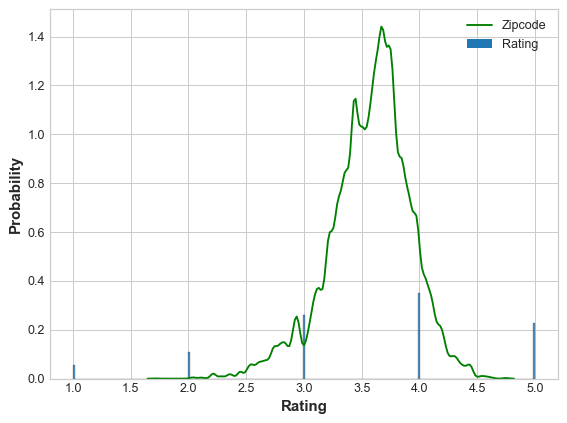

In [17]:
# Plot
plt.figure(dpi=90)
#ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.histplot(y, kde=False, stat='probability')
ax = sns.kdeplot(X_train.Zipcode, color='g', ax=ax)
ax.set_xlabel('Rating')
ax.legend(labels=['Zipcode', 'Rating'])